# Team ID:PNT2022TMID33022
project name:Predicting the energy output of wind turbine 
based on weather condition

# Import Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [84]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5iWRd93VLP6AjcVwwMckCc_boGlQdVj8t4c5pU8X2Tg5',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'predictingtheenergyoutputofwindtu-donotdelete-pr-2tthodalzad1qd'
object_key = 'Wind turbine.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
data = pd.read_csv(body)
data.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [85]:
data.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


<AxesSubplot:>

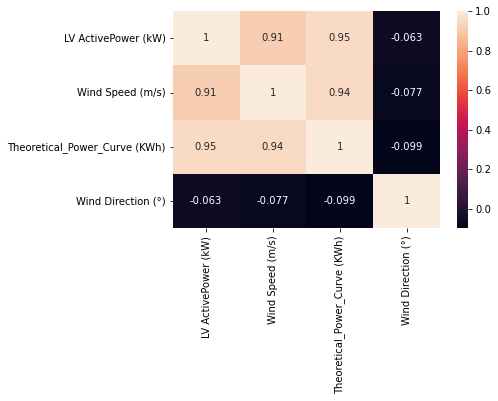

In [86]:
sns.heatmap(data.corr(),annot=True)

# Handling the null values

In [87]:
data.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

<AxesSubplot:>

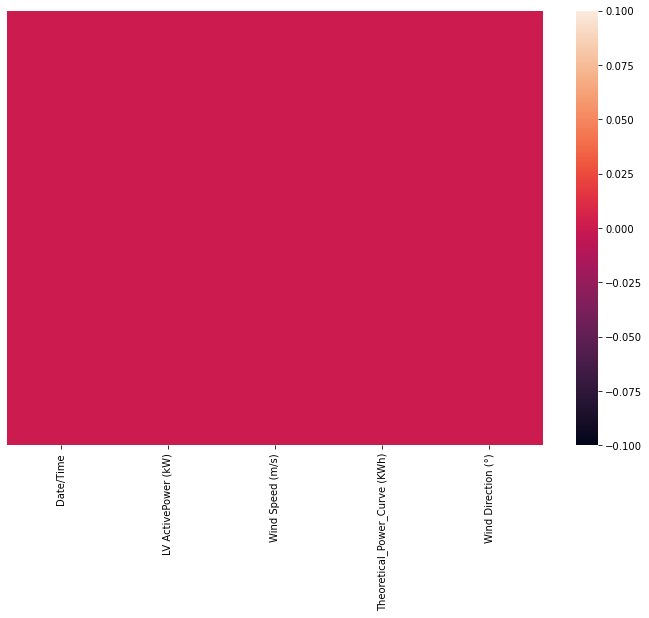

In [88]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(data.isna(),yticklabels=False)

In [89]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LV ActivePower (kW),50530.0,1307.684332,1312.459242,-2.471405,50.677890,825.838074,2482.507568,3618.732910
Wind Speed (m/s),50530.0,7.557952,4.227166,0.000000,4.201395,7.104594,10.300020,25.206011
Theoretical_Power_Curve (KWh),50530.0,1492.175463,1368.018238,0.000000,161.328167,1063.776283,2964.972462,3600.000000
Wind Direction (°),50530.0,123.687559,93.443736,0.000000,49.315437,73.712978,201.696720,359.997589


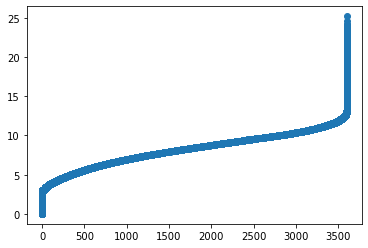

In [90]:
plt.scatter(data['Theoretical_Power_Curve (KWh)'],data['Wind Speed (m/s)'])

# Independent and Dependent variables

In [91]:
x=x = data[["Theoretical_Power_Curve (KWh)", "Wind Speed (m/s)"]]
y=data["LV ActivePower (kW)"]

In [92]:
x=x = data[["Theoretical_Power_Curve (KWh)", "Wind Speed (m/s)"]].values
y=data["LV ActivePower (kW)"].values

In [93]:
x

array([[ 416.32890782,    5.31133604],
       [ 519.91751106,    5.67216682],
       [ 390.90001581,    5.2160368 ],
       ...,
       [1788.28475526,    8.43535805],
       [2418.38250336,    9.42136574],
       [2779.18409628,    9.97933197]])

In [94]:
y=data['LV ActivePower (kW)'].values

In [95]:
y

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

# Splitting train and test sets

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [98]:
x_train

array([[0.00000000e+00, 2.73557210e+00],
       [0.00000000e+00, 2.67128205e+00],
       [4.28829073e+01, 3.41321802e+00],
       ...,
       [0.00000000e+00, 2.84113002e+00],
       [8.10212421e+01, 3.72345304e+00],
       [3.27356714e+03, 1.10031900e+01]])

In [99]:
y_train

array([  29.8223896 ,    0.        ,   45.25106049, ...,    0.        ,
         53.6293602 , 2806.25      ])

In [100]:
x_test

array([[5.89509974e+02, 5.89308596e+00],
       [4.00408306e+02, 5.25200796e+00],
       [4.36901697e+02, 5.38638210e+00],
       ...,
       [8.70305241e+02, 6.66071510e+00],
       [0.00000000e+00, 1.96099901e+00],
       [3.60000000e+03, 1.38598099e+01]])

In [101]:
y_test

array([505.74609375, 357.5486145 ,   0.        , ..., 757.28381348,
         0.        ,   0.        ])

# Model Building

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
RFR= RandomForestRegressor(n_estimators = 750, max_depth = 4, max_leaf_nodes = 500, random_state = 1)

In [104]:
RFR.fit(x_train,y_train) 

RandomForestRegressor(max_depth=4, max_leaf_nodes=500, n_estimators=750,
                      random_state=1)

In [105]:
x_test

array([[5.89509974e+02, 5.89308596e+00],
       [4.00408306e+02, 5.25200796e+00],
       [4.36901697e+02, 5.38638210e+00],
       ...,
       [8.70305241e+02, 6.66071510e+00],
       [0.00000000e+00, 1.96099901e+00],
       [3.60000000e+03, 1.38598099e+01]])

In [106]:
y_pred=RFR.predict(x_test)
y_pred

array([ 542.677475  ,  347.01999067,  347.01999067, ...,  772.79737093,
         10.75124393, 3370.75771748])

In [107]:
from sklearn.metrics import r2_score

acc=r2_score(y_test,y_pred)

acc

0.9099023737915708

In [108]:
import joblib
joblib.dump(RFR, "Power_Prediction.sav")

['Power_Prediction.sav']

In [109]:
joblib.dump(RFR, open(r'C:\Users\welcome\Desktop\team work IBM\power prediction\template\Power_Prediction.sav', 'wb'))

In [110]:
pip install -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [111]:
from ibm_watson_machine_learning import APIClient

In [112]:
wml_credentials = {
    "apikey":"NqfwMRhDq1weTZdyqDwUGt4qs1bFR0A5qtW7cCc_Hk9D",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [137]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------  ------------------------
ID                                    NAME                   CREATED
fc7ec723-878e-4ddb-8b45-622e6f102506  wind prediction        2022-11-15T02:23:30.712Z
83551f76-bbd2-4c2f-84c4-187742454775  Wind_Power_Prediction  2022-11-15T01:07:41.865Z
8e8e228d-9035-4786-b35f-06abd36419ee  model                  2022-11-15T01:04:57.972Z
------------------------------------  ---------------------  ------------------------


In [133]:
space_id ="fc7ec723-878e-4ddb-8b45-622e6f102506"

In [145]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [146]:
wml_client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [147]:
import sklearn
sklearn.__version__

'1.0.2'

In [148]:
MODEL_NAME = 'Wind_Energy_Prediction'
DEPLOYMENT_NAME = 'Wind_Energy_deploy'
WIND_ENERGY_MODEL = RFR

In [149]:

software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [150]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}


In [151]:
model_details = wml_client.repository.store_model(
    model=WIND_ENERGY_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [152]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-15T02:26:19.769Z',
  'id': 'fdef8a65-c175-451c-b063-6df90936fd3d',
  'modified_at': '2022-11-15T02:26:23.737Z',
  'name': 'Wind_Energy_Prediction',
  'owner': 'IBMid-666002IQZL',
  'resource_key': '3df4c6bd-534b-49a9-9293-440bba0023a8',
  'space_id': 'fc7ec723-878e-4ddb-8b45-622e6f102506'},
 'system': {'warnings': []}}

In [153]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'fdef8a65-c175-451c-b063-6df90936fd3d'

In [154]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [155]:
deployment = wml_client.deployments.create(
artifact_uid=model_id,
meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: 'fdef8a65-c175-451c-b063-6df90936fd3d' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a5c5a088-a1bd-4beb-ab73-700e0d864e14'
------------------------------------------------------------------------------------------------


